In [32]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [50]:
def create_three_channel_spectrogram(waveforms, fs=100, nperseg=64, noverlap=48):
    """
    Generate a three-channel spectrogram from waveforms.
    
    Parameters:
        waveforms (numpy.ndarray): Input waveform of shape (3, 2500) for 3 components.
        fs (int): Sampling frequency (default: 100 Hz).
        nperseg (int): Length of each segment for the FFT.
        noverlap (int): Number of points to overlap between segments.
        
    Returns:
        numpy.ndarray: Spectrogram of shape (3, F, T), where F is frequency bins, T is time bins.
    """
    spectrograms = []
    
    for i in range(3):
        # Compute the spectrogram for each component
        f, t, Sxx = spectrogram(waveforms[i], fs=fs, nperseg=nperseg, noverlap=noverlap)
        spectrograms.append(Sxx)
    
    # Stack into a 3-channel array
    spectrograms = np.stack(spectrograms, axis=0)  # Shape: (3, F, T)
    return spectrograms


In [49]:
def create_three_channel_log_spectrogram(waveforms, fs=100, nperseg=64, noverlap=48):
    """
    Generate a three-channel spectrogram from waveforms.
    
    Parameters:
        waveforms (numpy.ndarray): Input waveform of shape (3, 2500) for 3 components.
        fs (int): Sampling frequency (default: 100 Hz).
        nperseg (int): Length of each segment for the FFT.
        noverlap (int): Number of points to overlap between segments.
        
    Returns:
        numpy.ndarray: Spectrogram of shape (3, F, T), where F is frequency bins, T is time bins.
    """
    spectrograms = []
    
    for i in range(3):
        # Compute the spectrogram for each component
        f, t, Sxx = spectrogram(waveforms[i], fs=fs, nperseg=nperseg, noverlap=noverlap)
        
        # Apply logarithmic scaling to compress dynamic range
        Sxx = np.log1p(Sxx)  # log(1 + Sxx)
        
        spectrograms.append(Sxx)
    
    # Stack into a 3-channel array
    spectrograms = np.stack(spectrograms, axis=0)  # Shape: (3, F, T)
    return spectrograms

Number of Events: 4599
Shape: (3, 2500), Dtype: float64


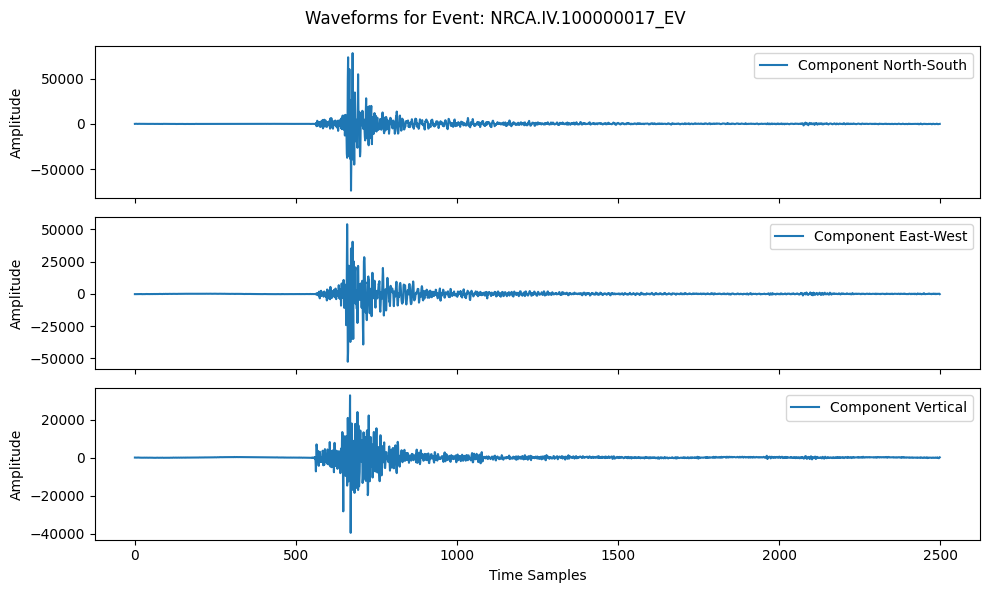

Spectrogram Shape: (3, 33, 153)


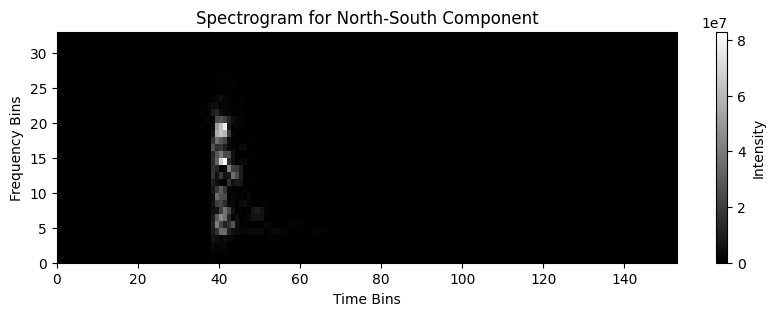

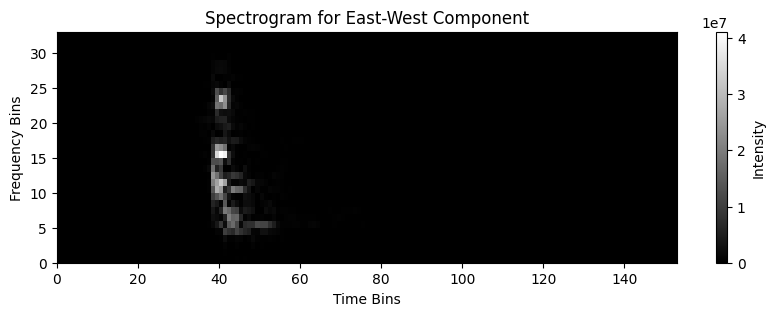

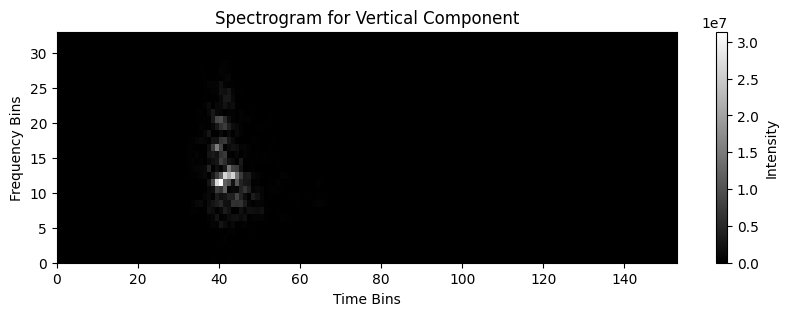

[[7.50767689e+00 2.45221975e+00 8.26085405e-01 ... 3.35410346e-02
  1.71624436e-01 1.15005376e+00]
 [3.18099165e+02 1.52951976e+02 4.16718726e+01 ... 1.86216910e+02
  1.66000507e+02 1.79374394e+02]
 [6.42720420e+01 1.48017948e+01 6.43355012e+00 ... 3.02725694e+01
  3.39756906e+01 3.43205362e+01]
 ...
 [5.38091417e-02 9.72799265e-04 1.33862213e-02 ... 6.21310767e-01
  5.00570741e-03 7.49213771e-02]
 [3.25067509e-02 1.66398891e-03 2.03305715e-02 ... 2.81204181e-01
  1.09935605e-04 2.58182405e-02]
 [2.56878705e-02 2.23266683e-03 1.92388678e-04 ... 1.13383404e-01
  2.31496193e-03 2.09735200e-02]]


In [ ]:
# Open the HDF5 file
file_path = r"E:\EQML Project\data\dataset\NRCA\NRCA_waveforms_pre.hdf5"  # Replace with the path to your file
with h5py.File(file_path, 'r') as hdf:
    # List all events in the HDF5 file
    events = list(hdf.keys())
    print(f"Number of Events: {len(events)}")
    
    # Access the first event
    event = events[0]  # Take the first waveform
    waveforms = hdf[event]  # Access the dataset for this event
    
    # Check the shape and details of the dataset
    print(f"Shape: {waveforms.shape}, Dtype: {waveforms.dtype}")
    # Shape should be (3, 2500), Dtype: float64 for three components

    # Plot the waveforms
    fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
    component_names = ['North-South', 'East-West', 'Vertical']
    
    for i in range(3):
        axes[i].plot(waveforms[i], label=f"Component {component_names[i]}")
        axes[i].set_ylabel("Amplitude")
        axes[i].legend(loc="upper right")
    
    axes[-1].set_xlabel("Time Samples")
    plt.suptitle(f"Waveforms for Event: {event}")
    plt.tight_layout()
    plt.show()

    # Create a three-channel spectrogram
    spectrograms = create_three_channel_spectrogram(waveforms)
    print(f"Spectrogram Shape: {spectrograms.shape}")

    # Plot the spectrograms
    components = ['North-South', 'East-West', 'Vertical']

    for i in range(3):
        plt.figure(figsize=(10, 3))
        plt.pcolormesh(spectrograms[i], cmap='gray')
        plt.colorbar(label='Intensity')
        plt.title(f"Spectrogram for {components[i]} Component")
        plt.xlabel('Time Bins')
        plt.ylabel('Frequency Bins')
        plt.show()

    print(spectrograms[i])
